<a href="https://colab.research.google.com/github/jaimeisaac2020/Python-analsisis-basicos/blob/mi-github/intervalo_confianza_t_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


count    150.000000
mean       0.110061
std        0.041333
min        0.029540
25%        0.080027
50%        0.104908
75%        0.140066
max        0.243743
Name: rate, dtype: float64
alpha=0.99
0.017611413809194454
Intervalo de confianza = (0.10125528979732593, 0.11886670360652038)
                                                                                                                                                                                                        
alpha=0.94
0.012792103997863707
Intervalo de confianza = (0.1036649447029913, 0.116457048700855)
                                                                                                                                                                                                        
alpha=0.8899999999999999
0.010851986291347177
Intervalo de confianza = (0.10463500355624956, 0.11548698984759674)
                                                                                                    

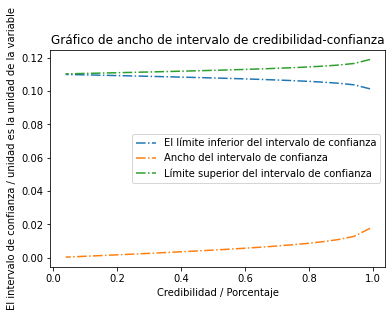

In [1]:
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

#os.chdir(r"D: \ python Finance")
data = pd.read_csv("house_price_gr.csv",encoding='gbk') # El archivo tiene chino, encoding = 'gbk'

matplotlib.rcParams['axes.unicode_minus']=False# Resuelva el problema de que el signo menos'- 'se muestra como un cuadrado al guardar la imagen
plt.rcParams['font.sans-serif'] = ['SimHei'] # Especifique la fuente predeterminada

# print (data.shape [0]) # Ver el número de muestras

# Dibuje un histograma plt.hist (datos de muestra, bins = número de columnas); el eje x predeterminado es el valor de muestra y el eje y es el número de valores de muestra
# plt.hist(data.rate,bins=40)
# plt.show()

# Ver la media, la desviación estándar, el percentil, etc.
print(data.rate.describe())

alpha = 0.99
alpha_list = [] # Lista de credibilidad
ci_width_list = [] # Lista de ancho de intervalo de confianza
ci_upper_limit = [] # Límite superior del intervalo de confianza
ci_lower_limit = [] # Límite inferior del intervalo de confianza
for i in range(20): 
    print("alpha={}".format(alpha))
    # El intervalo de confianza del intervalo de confianza del 99% de la media
    """ Intervalo de confianza """
    df = len(data.rate) - 1
    ci = stats.t.interval(alpha, df, loc=np.mean(data.rate), scale=stats.sem(data.rate))
    # ci = stats.t.interval(alpha=0.99,df=len(data.rate)-1,loc=np.mean(data.rate),scale=stats.sem(data.rate))

    # Calcule el ancho del intervalo de confianza
    ci_element = ci

    ci_lower_limit.append(ci_element[0])
    ci_upper_limit.append(ci_element[1])
    # ci_element.append(ci)
    ci_width = ci_element[1] - ci_element[0] # Defina el ancho del intervalo de confianza
    ci_width_list.append(ci_width)
    print(ci_width)  # Ancho del intervalo de confianza de salida

    alpha_list.append(alpha) # Agregar a la lista
    alpha = alpha - 0.05
    print("Intervalo de confianza = {}".format(ci))
    print("  "*100)

print(ci_width_list)
print(alpha_list)
x=alpha_list # Establecer credibilidad en el eje x
# y=ci_width_list

plt.plot(x,ci_lower_limit,linestyle="dashdot",label="El límite inferior del intervalo de confianza")
plt.plot(x,ci_width_list,linestyle="dashdot",label = "Ancho del intervalo de confianza")
plt.plot(x,ci_upper_limit,linestyle="dashdot",label= "Límite superior del intervalo de confianza")
plt.xlabel("Credibilidad / Porcentaje") # La confiabilidad se refiere al intervalo de credibilidad, en aras de la comprensión, la credibilidad se reemplaza por el intervalo de credibilidad
plt.ylabel("El intervalo de confianza / unidad es la unidad de la variable")
plt.title("Gráfico de ancho de intervalo de credibilidad-confianza")
plt.legend() # Mostrar etiqueta
"""
 Descripción del diagrama de nivel de confianza e intervalo de confianza:
 Por ejemplo: nivel de confianza = 0,90, ancho del intervalo de confianza = 0,05, límite superior del intervalo de confianza = 0,07, límite inferior del intervalo de confianza = 0,02
 Significa que la probabilidad de ocurrencia en el intervalo (0.02, 0.07) es 0.90

 Obtenido de la imagen: cuanto menor sea el ancho del intervalo de confianza, más preciso será el modelo de predicción; pero cuanto menor sea el ancho del intervalo de confianza, menor será la credibilidad
"""
plt.show()



